In [6]:
from sklearn import decomposition
import numpy

In [42]:
import pandas
import matplotlib.pyplot as plot
import seaborn

In [2]:
dataDF = pandas.read_csv('train.csv')

## 先看所有欄位的NA狀況

In [4]:
naCount = pandas.DataFrame(dataDF.isna().sum(), columns=['naCount'])

In [5]:
naCount

,naCount
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


## 把同樣欄位的NA Count與欄位資料型態給放在一起

In [6]:
dataType = pandas.DataFrame(dataDF.dtypes, columns=['columnType'])

In [18]:
concatData = pandas.concat([naCount, dataType], axis=1)

## 篩選出欄位型態是數值類，並觀察NA Count的部分

In [19]:
filterData = concatData[concatData['columnType'] != 'object']

In [30]:
filterData

,naCount,columnType
Id,0,int64
MSSubClass,0,int64
LotFrontage,259,float64
LotArea,0,int64
OverallQual,0,int64
OverallCond,0,int64
YearBuilt,0,int64
YearRemodAdd,0,int64
MasVnrArea,8,float64
BsmtFinSF1,0,int64


## 將這些欄位作為篩選條件，並觀察這些數值欄位的敘述如何

In [25]:
numericColumns = list(filterData.index)

In [32]:
numericData = dataDF[numericColumns]
numericData.to_csv('train_filtered_numeric.csv', index=0)

In [37]:
numericData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
numericData.describe().to_csv('numeric_column_desc.csv')

## 取得這些數值欄位彼此之間的相關性，並排序由高排到低

In [64]:
correlation = pandas.DataFrame(numericData.corr().unstack().sort_values().drop_duplicates()).reset_index()
correlation = correlation.rename(columns={'level_0': 'comparing', 'level_1': 'compared', 0: 'correlation'})
correlation
# correlation
# seaborn.heatmap(numericData.corr(), annot=True)
# plot.savefig('heatmap.png')

,comparing,compared,correlation
0,BsmtUnfSF,BsmtFinSF1,-0.495251
1,BsmtFullBath,BsmtUnfSF,-0.422900
2,EnclosedPorch,YearBuilt,-0.387268
3,LotFrontage,MSSubClass,-0.386347
4,YearBuilt,OverallCond,-0.375983
...,...,...,...
699,TotalBsmtSF,1stFlrSF,0.819530
700,TotRmsAbvGrd,GrLivArea,0.825489
701,YearBuilt,GarageYrBlt,0.825667
702,GarageArea,GarageCars,0.882475


In [71]:
correlation.sort_values(by=['correlation'], ascending=False)

,comparing,compared,correlation
703,Id,Id,1.000000
702,GarageArea,GarageCars,0.882475
701,YearBuilt,GarageYrBlt,0.825667
700,TotRmsAbvGrd,GrLivArea,0.825489
699,TotalBsmtSF,1stFlrSF,0.819530
...,...,...,...
4,YearBuilt,OverallCond,-0.375983
3,LotFrontage,MSSubClass,-0.386347
2,EnclosedPorch,YearBuilt,-0.387268
1,BsmtFullBath,BsmtUnfSF,-0.422900


In [70]:
correlation.sort_values(by=['correlation'], ascending=False).to_csv('numeric_data_correlation.csv', index=0)

In [72]:
!zip EDA.zip numeric_column_desc.csv numeric_data_correlation.csv train_filtered_numeric.csv

  adding: numeric_column_desc.csv (deflated 57%)
  adding: numeric_data_correlation.csv (deflated 66%)
  adding: train_filtered_numeric.csv (deflated 68%)


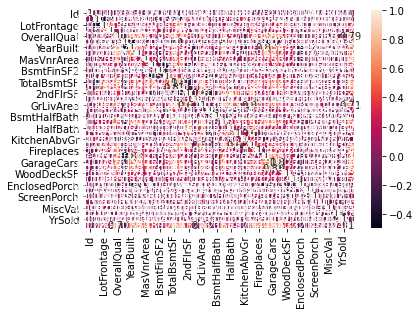

In [74]:
seaborn.heatmap(numericData.corr(), annot=True)
plot.savefig('heatmap.png', dpi=1440)

In [85]:
import numpy
t1 = numpy.array(list(range(0, 5)))
t2 = numpy.array(list(range(0, 5)))
print(t1)
print(t2)
# numpy.concatenate((t1, t2), axis = 1)

[0 1 2 3 4]
[0 1 2 3 4]


In [87]:
test = numpy.vstack((t1, t2))

In [88]:
test.reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 0],
       [1, 2],
       [3, 4]])

In [90]:
numpy.array([t1, t2]).T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])